In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import warnings
# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

In [2]:
# Configuracion de pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
# Ajustar las opciones de visualización para mostrar todos los elementos del array
pd.set_option('display.max_seq_items', None)

In [3]:
# Data
electric = pd.read_csv('../Datasets/my2012-2024-battery-electric-vehicles.csv')
electriccar = pd.read_csv('../Datasets/ElectricCarData_Clean.csv')
hybrid = pd.read_csv('../Datasets/my2012-2024-plug-in-hybrid-electric-vehicles.csv')
fuel = pd.read_csv('../Datasets/my2023-fuel-consumption-ratings.csv', encoding='latin-1')

In [4]:
electric.head(2)

,Model year,Make,Model,Vehicle class,Motor (kW),Transmission,Fuel type,City (kWh/100 km),Highway (kWh/100 km),Combined (kWh/100 km),City (Le/100 km),Highway (Le/100 km),Combined (Le/100 km),Range (km),CO2 emissions (g/km),CO2 rating,Smog rating,Recharge time (h)
0,2012,Mitsubishi,i-MiEV,Subcompact,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100,0,NaN,NaN,7.0
1,2012,Nissan,LEAF,Mid-size,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117,0,NaN,NaN,7.0


In [5]:
hybrid.head(2)

,Model year,Make,Model,Vehicle class,Motor (kW),Engine size (L),Cylinders,Transmission,Fuel type 1,Combined Le/100 km,Range 1 (km),Recharge time (h),Fuel type 2,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Range 2 (km),CO2 emissions (g/km),CO2 rating,Smog rating
0,2012,Chevrolet,Volt,Compact,111,1.4,4,AV,B,2.5 (22.3 kWh/100 km),56,4.0,Z,6.7,5.9,6.4,550,54,NaN,NaN
1,2013,Chevrolet,Volt,Compact,111,1.4,4,AV,B,2.4 (21.4 kWh/100 km),61,4.0,Z,6.7,5.9,6.4,550,45,NaN,NaN


In [6]:
fuel.head(2)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7


In [7]:
electriccar.head(2)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000


In [8]:
print(electric.isna().sum().to_list())
print(hybrid.isna().sum().to_list())
print(fuel.isna().sum().to_list())
print(electriccar.isna().sum().to_list())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34, 61, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 36]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
electric = electric.dropna().reset_index(drop=True)
hybrid = hybrid.dropna().reset_index(drop=True)

In [10]:
electric.describe()

,Model year,Motor (kW),City (kWh/100 km),Highway (kWh/100 km),Combined (kWh/100 km),City (Le/100 km),Highway (Le/100 km),Combined (Le/100 km),Range (km),CO2 emissions (g/km),CO2 rating,Smog rating,Recharge time (h)
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.0,624.0,624.0,624.000000
mean,2022.250000,336.158654,21.761699,23.889103,22.728526,2.447115,2.681090,2.550321,440.995192,0.0,10.0,10.0,10.289183
std,1.968859,160.041464,4.931537,5.181791,4.934240,0.553806,0.576363,0.551315,120.802938,0.0,0.0,0.0,2.683418
min,2017.000000,49.000000,13.700000,14.900000,14.800000,1.500000,1.700000,1.700000,92.000000,0.0,10.0,10.0,3.000000
25%,2021.000000,211.000000,17.575000,20.500000,18.800000,2.000000,2.300000,2.100000,372.750000,0.0,10.0,10.0,8.400000
50%,2023.000000,318.000000,21.050000,23.000000,21.900000,2.400000,2.600000,2.500000,438.500000,0.0,10.0,10.0,10.100000
75%,2024.000000,418.000000,25.600000,26.500000,26.125000,2.900000,3.000000,2.900000,507.000000,0.0,10.0,10.0,12.000000
max,2024.000000,930.000000,43.800000,49.000000,45.900000,4.900000,5.500000,5.200000,837.000000,0.0,10.0,10.0,18.000000


In [11]:
# Normalizar columnas de los DataFrames
def normalize_column_names(df):
    df.columns = [col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_') for col in df.columns]
    return df

In [12]:
electric = normalize_column_names(electric)
hybrid = normalize_column_names(hybrid)
fuel = normalize_column_names(fuel)
electriccars = normalize_column_names(electriccar)

In [13]:
hybrid.head(2)

,model_year,make,model,vehicle_class,motor_kw,engine_size_l,cylinders,transmission,fuel_type_1,combined_le_100_km,range_1_km,recharge_time_h,fuel_type_2,city_l_100_km,highway_l_100_km,combined_l_100_km,range_2_km,co2_emissions_g_km,co2_rating,smog_rating
0,2017,Audi,A3 e-tron,Compact,80,1.4,4,A6,B/Z*,2.8 ([25.5 kWh + 0.0 L]/100 km),26,2.5,Z,7.2,6.6,6.9,579,98,10.0,8.0
1,2017,BMW,330e,Compact,65,2.0,4,AS8,B/Z*,3.3 ([29.5 kWh + 0.0 L]/100 km),23,2.0,Z,8.5,6.9,7.8,533,118,10.0,6.0


In [14]:
fuel.head(2)

,model_year,make,model,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,city_l_100_km,highway_l_100_km,combined_l_100_km,combined_mpg,co2_emissions_g_km,co2_rating,smog_rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7


In [15]:
electric.head(2)

,model_year,make,model,vehicle_class,motor_kw,transmission,fuel_type,city_kwh_100_km,highway_kwh_100_km,combined_kwh_100_km,city_le_100_km,highway_le_100_km,combined_le_100_km,range_km,co2_emissions_g_km,co2_rating,smog_rating,recharge_time_h
0,2017,BMW,i3 (60 Ah),Subcompact,125,A1,B,15.2,18.8,16.8,1.7,2.1,1.9,130,0,10.0,10.0,4.0
1,2017,BMW,i3 (94 Ah),Subcompact,125,A1,B,16.2,19.7,17.8,1.8,2.2,2.0,183,0,10.0,10.0,5.0


## Comparación de Eficiencia de Energía

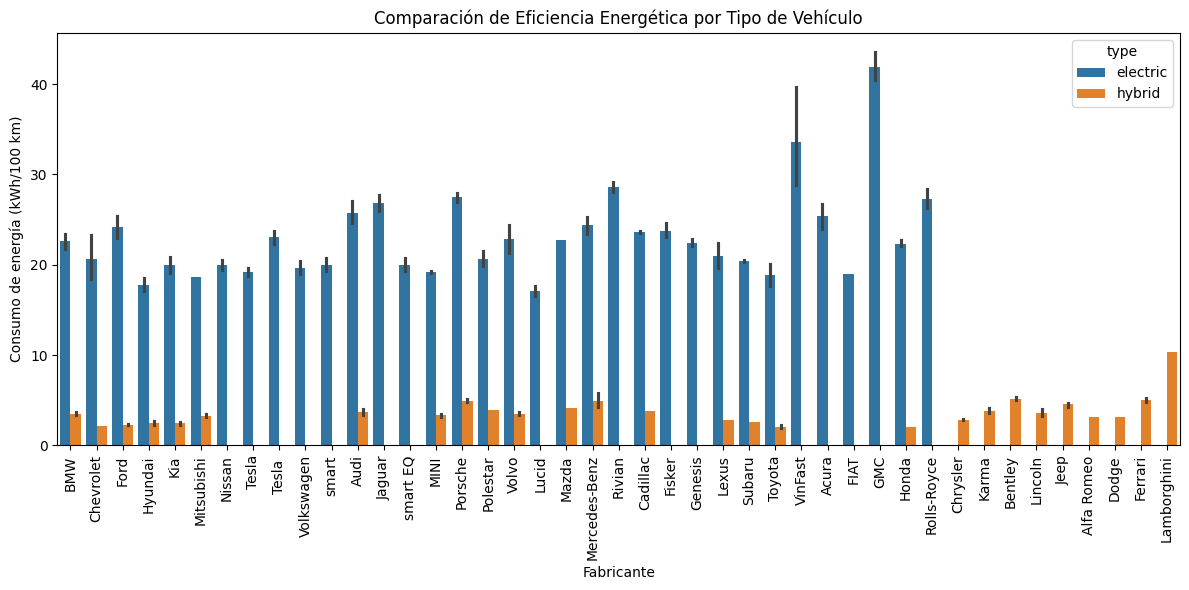

In [16]:
# Combinar los valores de consumo de energía de eléctricos e híbridos
electric['efficiency_kwh_per_100_km'] = electric['combined_kwh_100_km']
hybrid['efficiency_kwh_per_100_km'] = hybrid['combined_le_100_km'].str.extract(r'(\d+\.\d+)').astype(float)

# Añadir una columna de tipo de vehículo
electric['type'] = 'electric'
hybrid['type'] = 'hybrid'

# Concatenar los DataFrames
vehicles = pd.concat([electric[['model_year', 'make', 'model', 'efficiency_kwh_per_100_km', 'range_km', 'recharge_time_h', 'type']],
                    hybrid[['model_year', 'make', 'model', 'efficiency_kwh_per_100_km', 'range_1_km', 'recharge_time_h', 'type']]])

# Renombrar para unificar
vehicles.rename(columns={'range_1_km': 'range_km'}, inplace=True)

# Gráfico de barras apiladas
plt.figure(figsize=(12,6))
sns.barplot(x='make', y='efficiency_kwh_per_100_km', hue='type', data=vehicles)
plt.title('Comparación de Eficiencia Energética por Tipo de Vehículo')
plt.xlabel('Fabricante')
plt.ylabel('Consumo de energía (kWh/100 km)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
hybrid.head(1)

,model_year,make,model,vehicle_class,motor_kw,engine_size_l,cylinders,transmission,fuel_type_1,combined_le_100_km,range_1_km,recharge_time_h,fuel_type_2,city_l_100_km,highway_l_100_km,combined_l_100_km,range_2_km,co2_emissions_g_km,co2_rating,smog_rating,efficiency_kwh_per_100_km,type
0,2017,Audi,A3 e-tron,Compact,80,1.4,4,A6,B/Z*,2.8 ([25.5 kWh + 0.0 L]/100 km),26,2.5,Z,7.2,6.6,6.9,579,98,10.0,8.0,2.8,hybrid


In [18]:
electric.head(1)

,model_year,make,model,vehicle_class,motor_kw,transmission,fuel_type,city_kwh_100_km,highway_kwh_100_km,combined_kwh_100_km,city_le_100_km,highway_le_100_km,combined_le_100_km,range_km,co2_emissions_g_km,co2_rating,smog_rating,recharge_time_h,efficiency_kwh_per_100_km,type
0,2017,BMW,i3 (60 Ah),Subcompact,125,A1,B,15.2,18.8,16.8,1.7,2.1,1.9,130,0,10.0,10.0,4.0,16.8,electric


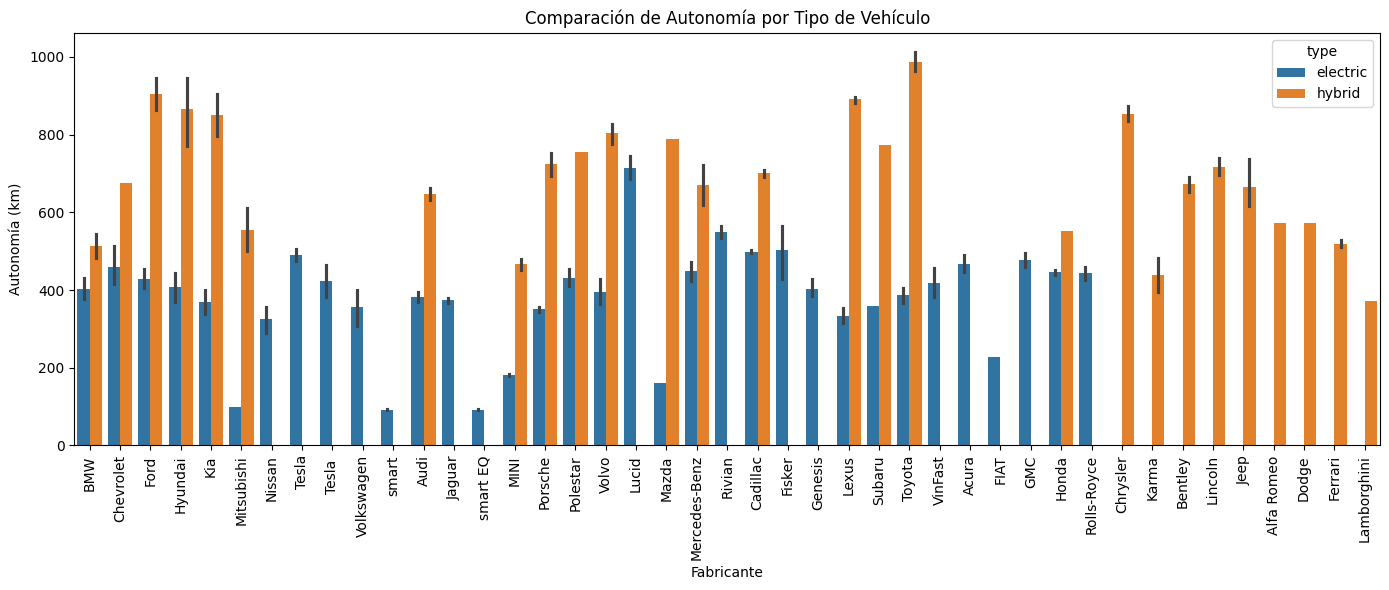

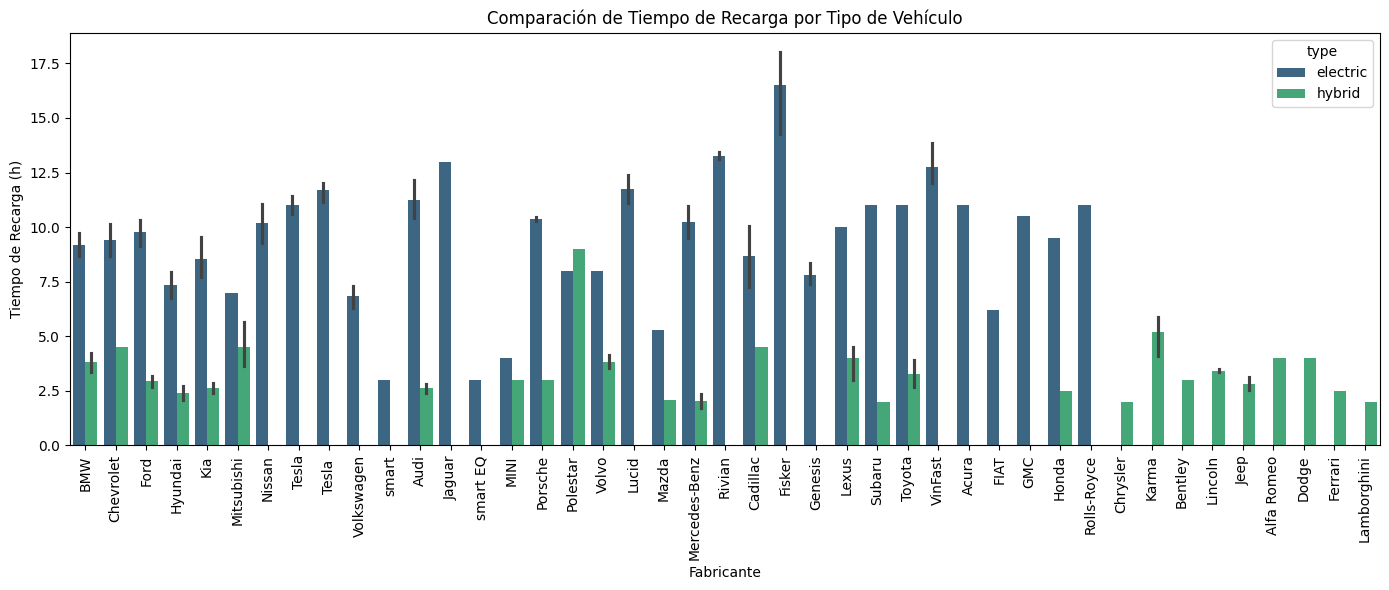

In [19]:
# Crear la columna 'range_km' combinada para híbridos
if 'range_1_km' in hybrid.columns and 'range_2_km' in hybrid.columns:
    hybrid['range_km'] = hybrid['range_1_km'] + hybrid['range_2_km']
else:
    print("Error: Las columnas 'range_1_km' o 'range_2_km' no están presentes en el DataFrame de híbridos.")

# Convertir el tiempo de recarga a minutos en el DataFrame de híbridos
if 'recharge_time_h' in hybrid.columns:
    hybrid['recharge_time_min'] = hybrid['recharge_time_h'] * 60
else:
    print("Error: La columna 'recharge_time_h' no está presente en el DataFrame de híbridos.")

# Añadir una columna de tipo de vehículo
electric['type'] = 'electric'
hybrid['type'] = 'hybrid'

# Seleccionar y renombrar las columnas para la concatenación
electric_for_concat = electric[['model_year', 'make', 'model', 'range_km', 'recharge_time_h', 'type']].copy()
hybrid_for_concat = hybrid[['model_year', 'make', 'model', 'range_km', 'recharge_time_h', 'type']].copy()

# Renombrar la columna en la copia del DataFrame híbrido
hybrid_for_concat.rename(columns={'recharge_time_min': 'recharge_time_h'}, inplace=True)

# Concatenar los DataFrames
vehicles = pd.concat([electric_for_concat, hybrid_for_concat], ignore_index=True)

# Eliminar columnas duplicadas si existen
vehicles = vehicles.loc[:, ~vehicles.columns.duplicated()]

# Convertir a numérico las columnas relevantes
vehicles['range_km'] = pd.to_numeric(vehicles['range_km'], errors='coerce')
vehicles['recharge_time_h'] = pd.to_numeric(vehicles['recharge_time_h'], errors='coerce')

# Eliminar filas con datos no válidos
vehicles.dropna(subset=['range_km', 'recharge_time_h'], inplace=True)

# Gráfico de barras para autonomía
plt.figure(figsize=(14, 6))
sns.barplot(x='make', y='range_km', hue='type', data=vehicles)
plt.title('Comparación de Autonomía por Tipo de Vehículo')
plt.xlabel('Fabricante')
plt.ylabel('Autonomía (km)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico de barras para tiempo de recarga
plt.figure(figsize=(14, 6))
sns.barplot(x='make', y='recharge_time_h', hue='type', data=vehicles, palette='viridis')
plt.title('Comparación de Tiempo de Recarga por Tipo de Vehículo')
plt.xlabel('Fabricante')
plt.ylabel('Tiempo de Recarga (h)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##  Análisis de Emisiones de CO2 y Autonomía de vehiculos

In [20]:
# Asumir una capacidad promedio del tanque de combustible (en litros)
fuel_tank_capacity_l = 50

# Calcular la autonomía (range_km) para vehículos de combustión interna
fuel['range_km'] = (fuel_tank_capacity_l / fuel['combined_l_100_km']) * 100

# Combinar las columnas de autonomía para híbridos
hybrid['range_km'] = hybrid[['range_1_km', 'range_2_km']].max(axis=1)

# Concatenar todos los DataFrames
combined_vehicles = pd.concat([fuel, hybrid, electric], ignore_index=True)

# Verificar la columna `range_km` en el DataFrame combinado
print(combined_vehicles[['model', 'range_km']].head(2))

            model    range_km
0         Integra  694.444444
1  Integra A-SPEC  675.675676


In [21]:
# Calcular promedios asegurando que las columnas existen
try:
    promedios_electrico = round(electric.mean(numeric_only=True),2)
    promedios_hibrido = round(hybrid.mean(numeric_only=True),2)
    promedios_fuel = round(fuel.mean(numeric_only=True),2)
except KeyError as e:
    print(f"Error: {e}")

# Costo de electricidad y combustible
costo_electricidad = 0.15  # $/kWh
costo_combustible = 3.5    # $/L

# Calcular gasto económico por 100 km
gasto_electrico = promedios_electrico.get('combined_kwh_100_km', 0) * costo_electricidad
gasto_hibrido = promedios_hibrido.get('combined_l_100_km', 0) * costo_combustible
gasto_fuel = promedios_fuel.get('combined_l_100_km', 0) * costo_combustible

# Crear un DataFrame para comparar los promedios
fuel_vs_hybrid_vs_electric = pd.DataFrame({
    'Tipo de Vehículo': ['Eléctrico', 'Híbrido', 'Combustión (Fuel)'],
    'Gasto Económico ($/100 km)': [gasto_electrico, gasto_hibrido, gasto_fuel],
    'Emisiones de CO2 (g/km)': [
        promedios_electrico.get('co2_emissions_g_km', None),
        promedios_hibrido.get('co2_emissions_g_km', None),
        promedios_fuel.get('co2_emissions_g_km', None)
    ],
    'Calificación de Smog': [
        promedios_electrico.get('smog_rating', None),
        promedios_hibrido.get('smog_rating', None),
        promedios_fuel.get('smog_rating', None)
    ]
})

# Mostrar la comparación
fuel_vs_hybrid_vs_electric

,Tipo de Vehículo,Gasto Económico ($/100 km),Emisiones de CO2 (g/km),Calificación de Smog
0,Eléctrico,3.4095,0.00,10.00
1,Híbrido,30.2050,100.27,6.20
2,Combustión (Fuel),38.7800,258.06,5.23


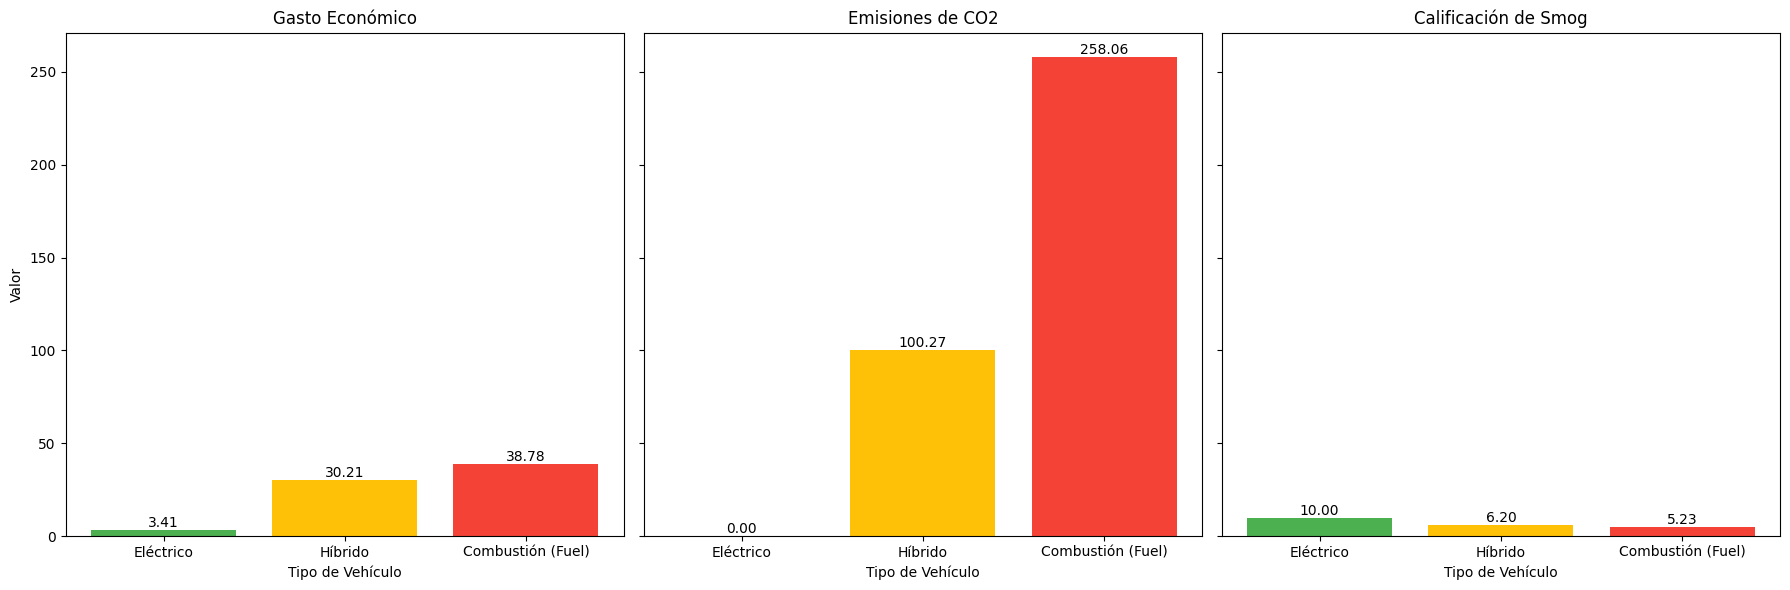

In [22]:
# Crear la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Definir las etiquetas y los datos para cada gráfico
etiquetas = ['Gasto Económico ($/100 km)', 'Emisiones de CO2 (g/km)', 'Calificación de Smog']
datos = [
    fuel_vs_hybrid_vs_electric['Gasto Económico ($/100 km)'],
    fuel_vs_hybrid_vs_electric['Emisiones de CO2 (g/km)'],
    fuel_vs_hybrid_vs_electric['Calificación de Smog']
]

# Títulos para los subplots
titulos = ['Gasto Económico', 'Emisiones de CO2', 'Calificación de Smog']

# Graficar cada gráfico en su subplot
for i, ax in enumerate(axs):
    bars = ax.bar(fuel_vs_hybrid_vs_electric['Tipo de Vehículo'], datos[i], color=['#4CAF50', '#FFC107', '#F44336'])
    ax.set_title(titulos[i])
    ax.set_xlabel('Tipo de Vehículo')
    if i == 0:
        ax.set_ylabel('Valor')
    
    # Agregar los valores en las barras
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Posición X (centro de la barra)
            yval,  # Posición Y (altura de la barra)
            f'{yval:.2f}',  # Valor a mostrar
            ha='center',  # Alineación horizontal
            va='bottom',  # Alineación vertical
            fontsize=10,  # Tamaño de la fuente
            color='black'  # Color del texto
        )

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

In [23]:
# Asegurarse de que los datos son numéricos y eliminar filas con datos no válidos
electric['co2_emissions_g_km'] = pd.to_numeric(electric['co2_emissions_g_km'], errors='coerce')
hybrid['co2_emissions_g_km'] = pd.to_numeric(hybrid['co2_emissions_g_km'], errors='coerce')

# Eliminar filas con datos no válidos
electric.dropna(subset=['co2_emissions_g_km'], inplace=True)
hybrid.dropna(subset=['co2_emissions_g_km'], inplace=True)

# Añadir el tipo de vehículo para combinar
electric['type'] = 'electric'
hybrid['type'] = 'hybrid'

# Seleccionar columnas relevantes para la combinación
electric_for_concat = electric[['model_year', 'make', 'model', 'co2_emissions_g_km', 'type']].copy()
hybrid_for_concat = hybrid[['model_year', 'make', 'model', 'co2_emissions_g_km', 'type']].copy()

# Combinar los DataFrames
vehicles = pd.concat([electric_for_concat, hybrid_for_concat], ignore_index=True)

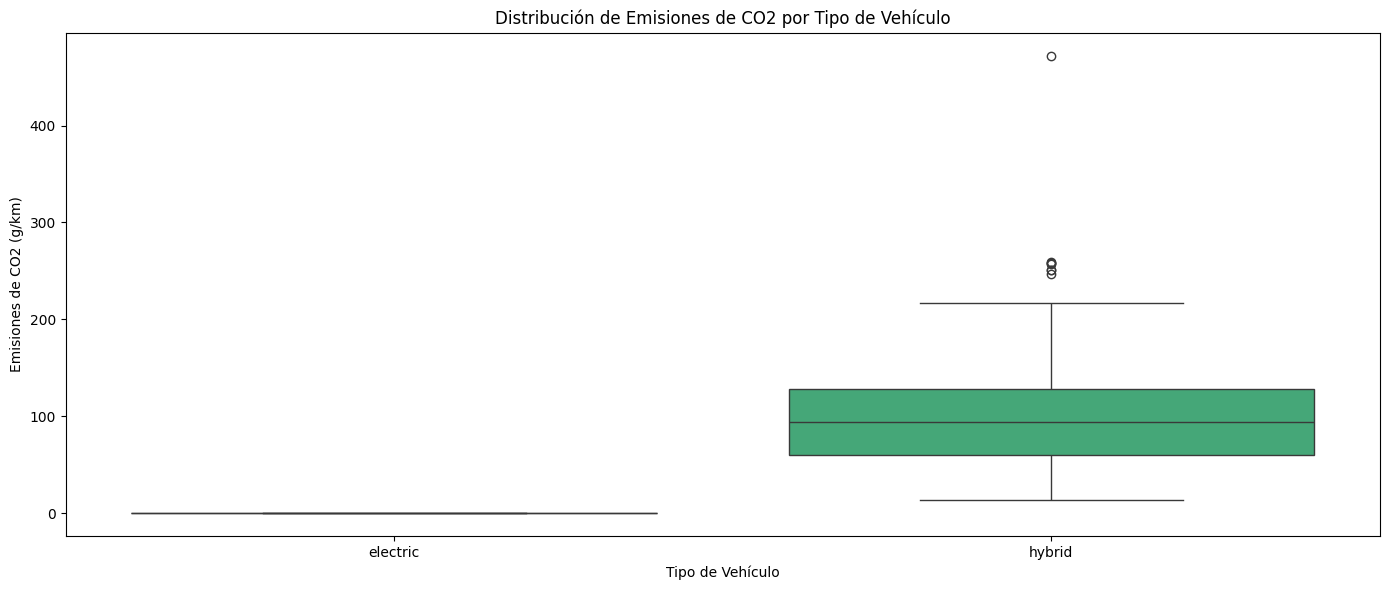

In [24]:
# Gráfico de cajas para la distribución de emisiones de CO2
plt.figure(figsize=(14, 6))
sns.boxplot(x='type', y='co2_emissions_g_km', data=vehicles, palette='viridis')
plt.title('Distribución de Emisiones de CO2 por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.tight_layout()
plt.show()

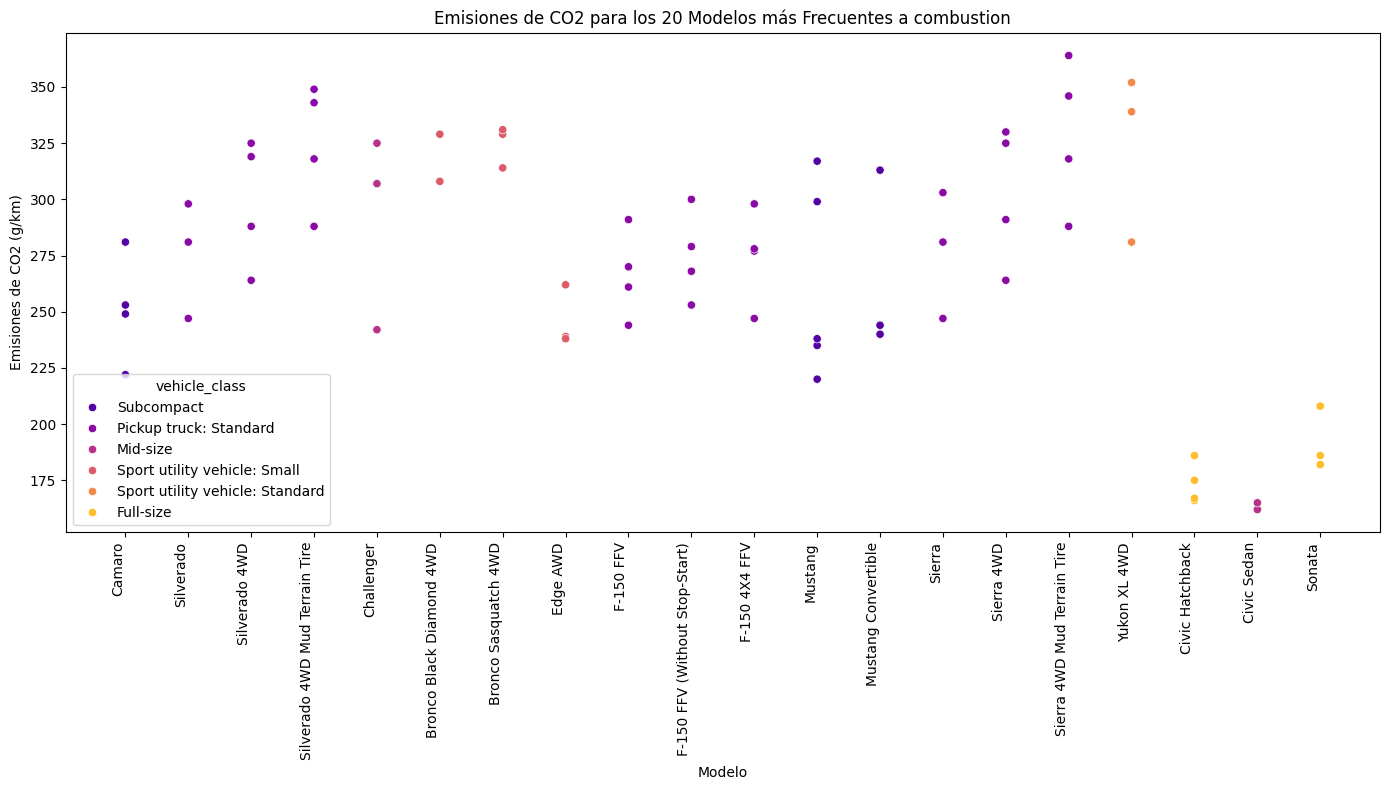

In [25]:
# Filtrar los 20 modelos más frecuentes
top_models = fuel['model'].value_counts().head(20).index
filtered_fuel = fuel[fuel['model'].isin(top_models)]

# Gráfico de dispersión ajustado para los modelos filtrados
plt.figure(figsize=(14, 8))
sns.scatterplot(x='model', y='co2_emissions_g_km', hue='vehicle_class', data=filtered_fuel, palette='plasma')

# Ajustar rotación de etiquetas en el eje x
plt.title('Emisiones de CO2 para los 20 Modelos más Frecuentes a combustion')
plt.xlabel('Modelo')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas para mejor legibilidad
plt.tight_layout()
plt.show()


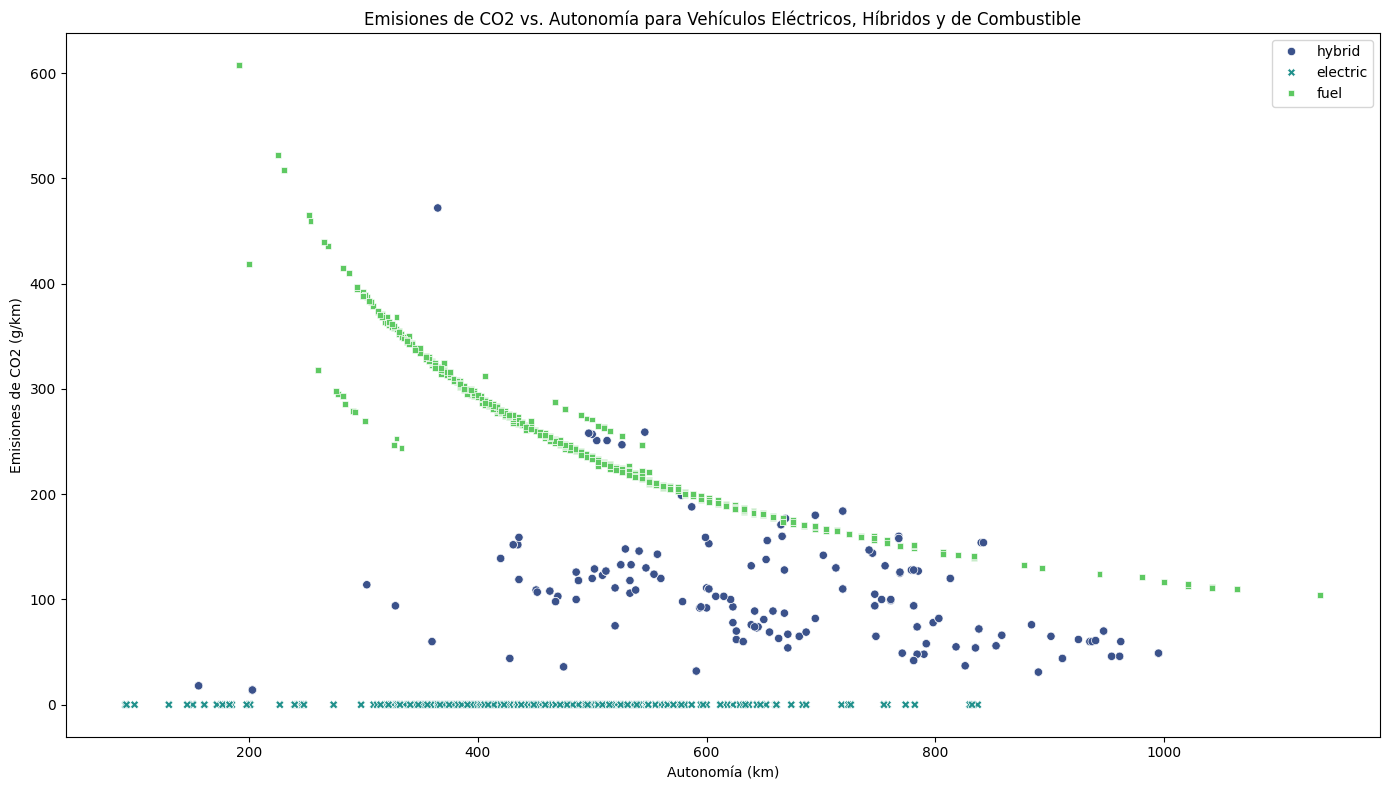

In [26]:
# Añadir la columna 'type' a los vehículos de combustible
fuel['type'] = 'fuel'

# Filtrar vehículos híbridos y eléctricos con la columna 'range_km'
electric_hybrid_vehicles = combined_vehicles[combined_vehicles['type'].isin(['electric', 'hybrid'])]

# Combinar los tres tipos de vehículos: eléctricos, híbridos y de combustible
combined_vehicles = pd.concat([electric_hybrid_vehicles, fuel], ignore_index=True)

# Gráfico de dispersión para vehículos eléctricos, híbridos y de combustible
plt.figure(figsize=(14, 8))
sns.scatterplot(x='range_km', y='co2_emissions_g_km', hue='type', style='type', data=combined_vehicles, palette='viridis')
plt.title('Emisiones de CO2 vs. Autonomía para Vehículos Eléctricos, Híbridos y de Combustible')
plt.xlabel('Autonomía (km)')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

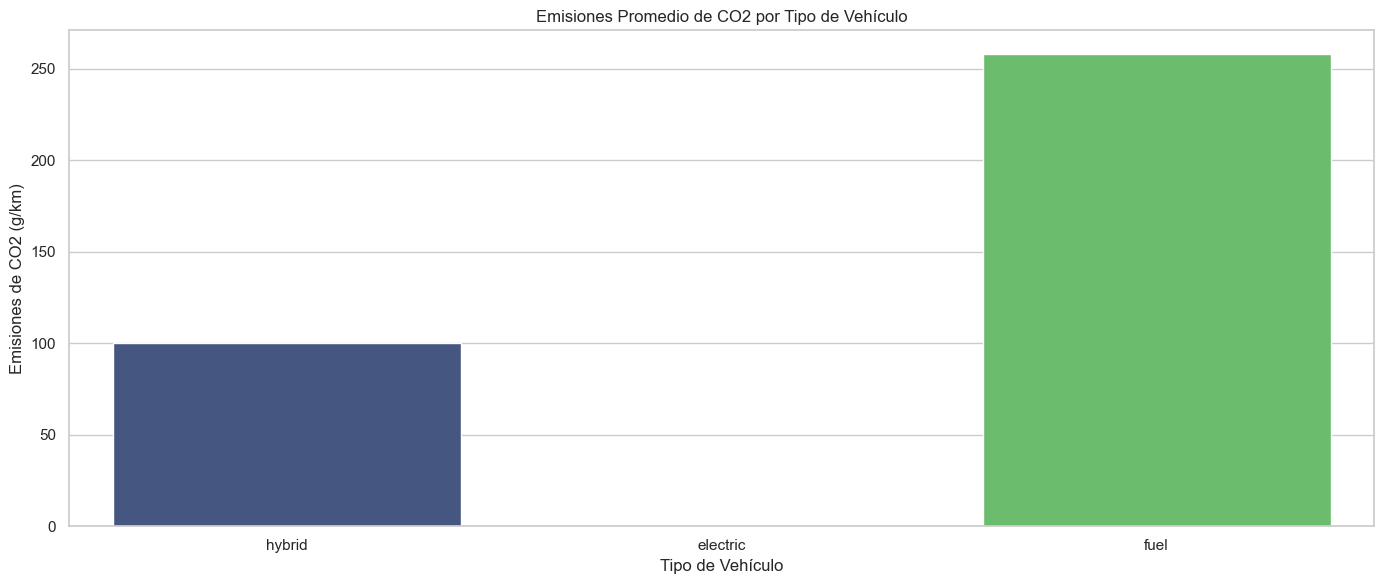

In [27]:
# Añadir la columna 'type' a los vehículos de combustible si aún no se ha hecho
fuel['type'] = 'fuel'

# Combinar los tres tipos de vehículos: eléctricos, híbridos y de combustible
vehicles = pd.concat([electric_hybrid_vehicles, fuel], ignore_index=True)

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Gráfico de barras para emisiones promedio de CO2
plt.figure(figsize=(14, 6))
sns.barplot(x='type', y='co2_emissions_g_km', data=vehicles, palette='viridis', ci=None)
plt.title('Emisiones Promedio de CO2 por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.tight_layout()
plt.show()


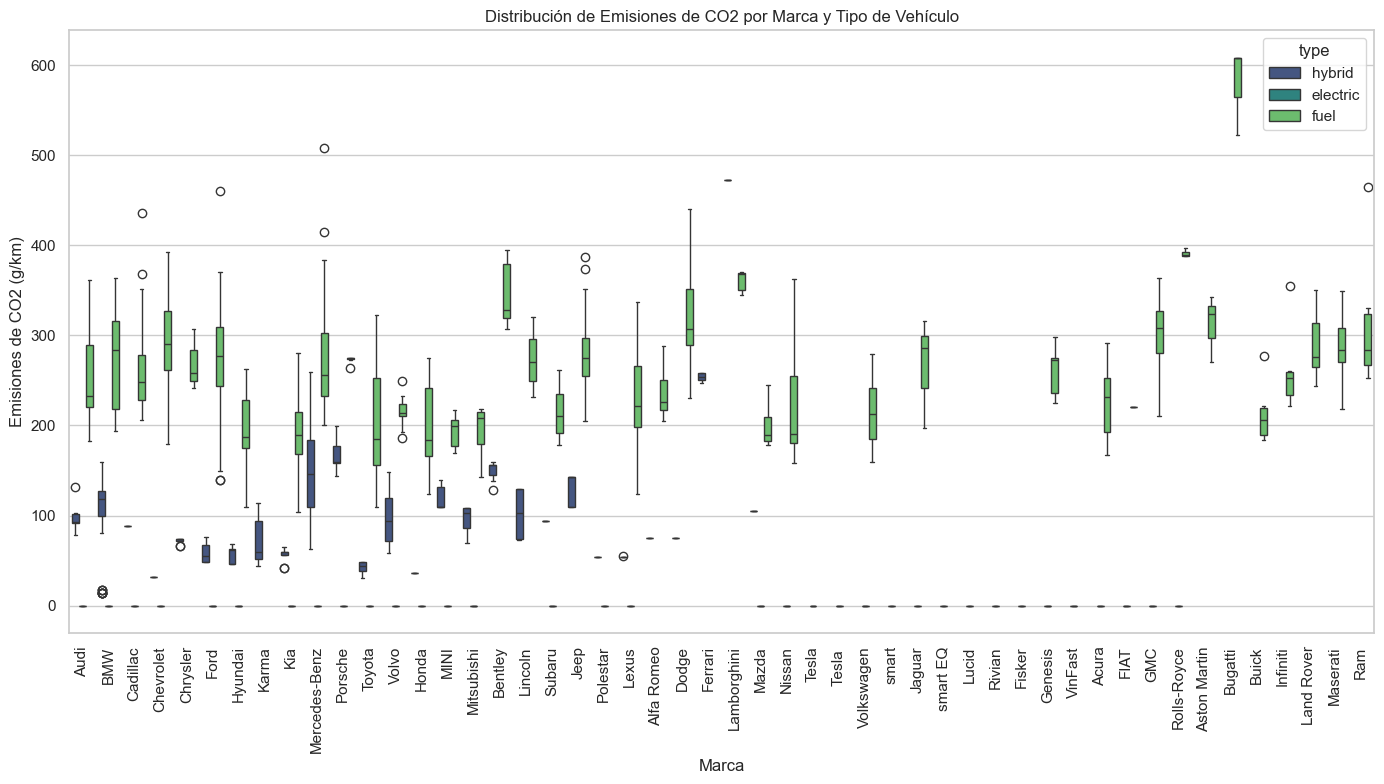

In [28]:
# Agrupar por marca o categoría
plt.figure(figsize=(14, 8))
sns.boxplot(x='make', y='co2_emissions_g_km', hue='type', data=vehicles, palette='viridis')
plt.title('Distribución de Emisiones de CO2 por Marca y Tipo de Vehículo')
plt.xlabel('Marca')
plt.ylabel('Emisiones de CO2 (g/km)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


* Grafico interactivo

In [29]:
# Gráfico de cajas interactivo
fig = px.box(vehicles, x='model', y='co2_emissions_g_km', color='type', 
            title='Distribución de Emisiones de CO2 por Modelo y Tipo de Vehículo',
            labels={'model': 'Modelo', 'co2_emissions_g_km': 'Emisiones de CO2 (g/km)'})

# Mejorar la visibilidad
fig.update_layout(xaxis_title='Modelo', yaxis_title='Emisiones de CO2 (g/km)', xaxis_tickangle=-90)
fig.show()


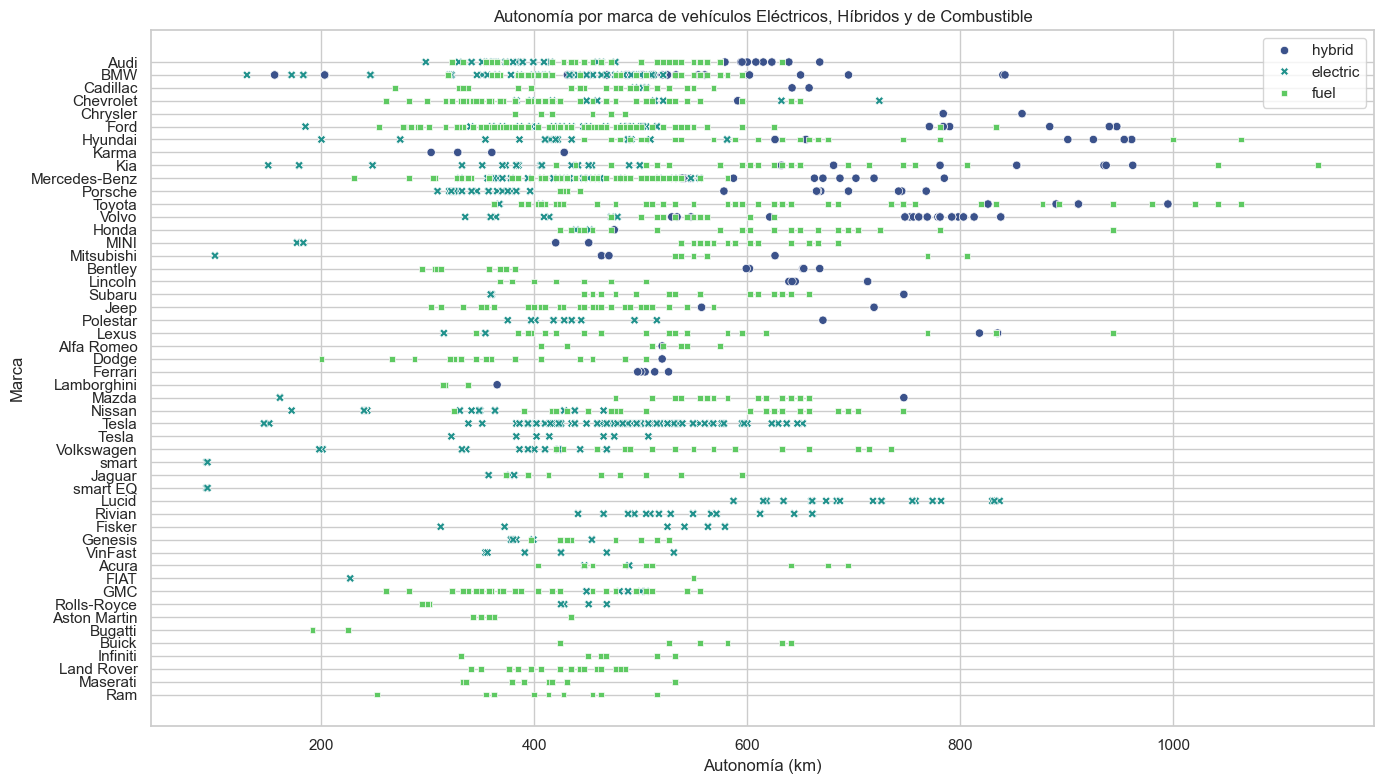

In [30]:
# Cambiar 'co2_emissions_g_km' a 'brand' en el gráfico
plt.figure(figsize=(14, 8))
sns.scatterplot(x='range_km', y='make', hue='type', style='type', data=combined_vehicles, palette='viridis')
plt.title('Autonomía por marca de vehículos Eléctricos, Híbridos y de Combustible')
plt.xlabel('Autonomía (km)')
plt.ylabel('Marca')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Marcas y Modelos de Vehiculos

In [40]:
# Contar el número de vehículos por marca
count_by_make = combined_vehicles['make'].value_counts()

# Convertir a DataFrame para visualización
count_by_make_df = count_by_make.reset_index()
count_by_make_df.columns = ['make', 'count']

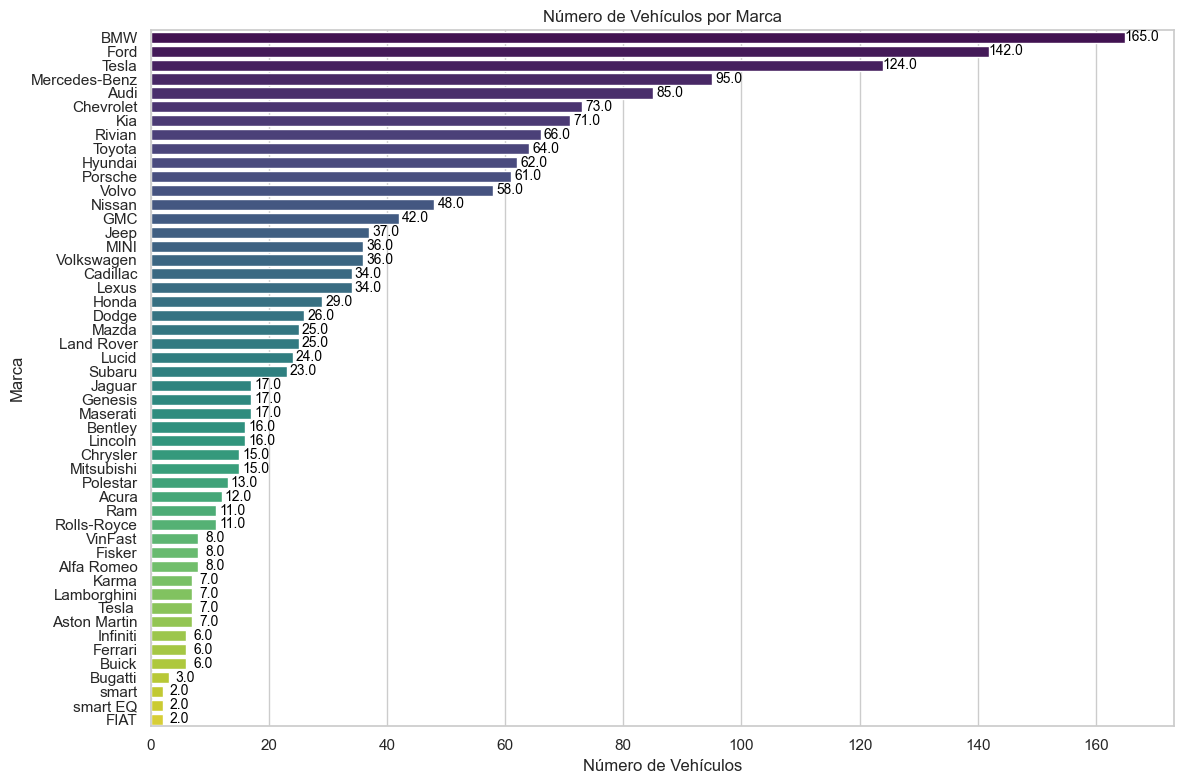

In [53]:
# Gráfico de barras para el conteo de vehículos por marca
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='count', y='make', data=count_by_make_df, palette='viridis')

# Añadir etiquetas a cada barra
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', (width, p.get_y() + p.get_height() / 2),
                ha='center', va='center', color='black', fontsize=10, xytext=(12, 0),
                textcoords='offset points')

plt.title('Número de Vehículos por Marca')
plt.xlabel('Número de Vehículos')
plt.ylabel('Marca')
plt.tight_layout()
plt.show()

In [34]:
# Contar el número de vehículos por clase
count_by_type = combined_vehicles['vehicle_class'].value_counts()

# Convertir a DataFrame para visualización
count_by_class_df = count_by_type.reset_index()
count_by_class_df.columns = ['vehicle_class', 'count']

# Mostrar el DataFrame con el conteo por clase
print(count_by_class_df)


                      vehicle_class  count
0      Sport utility vehicle: Small    384
1   Sport utility vehicle: Standard    317
2                          Mid-size    270
3                         Full-size    159
4            Pickup truck: Standard    144
5                           Compact    135
6                        Subcompact    128
7              Station wagon: Small     69
8                        Two-seater     48
9                       Minicompact     24
10              Pickup truck: Small     17
11                          Minivan     15
12          Station wagon: Mid-size      9
13          Special purpose vehicle      5


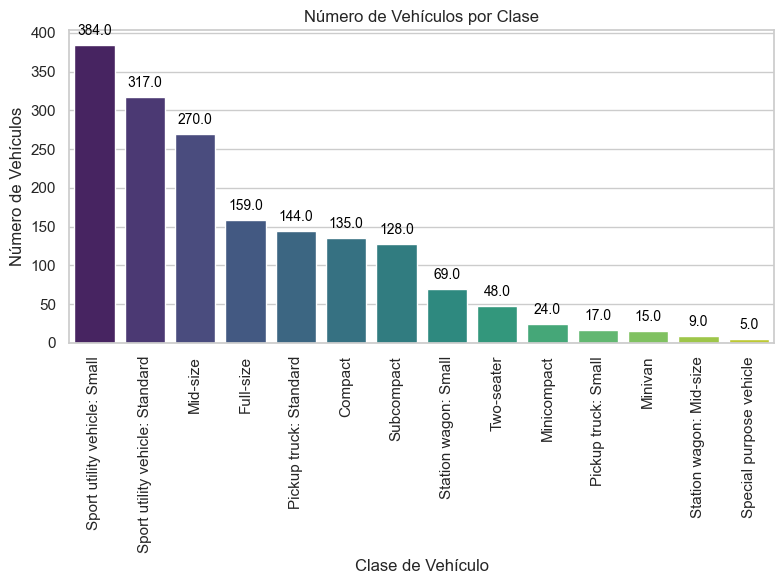

In [46]:
# Gráfico de barras para el conteo de vehículos por clase
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='vehicle_class', y='count', data=count_by_class_df, palette='viridis')

# Añadir etiquetas a cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', fontsize=10, xytext=(0, 5),
                textcoords='offset points')

plt.title('Número de Vehículos por Clase')
plt.xlabel('Clase de Vehículo')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [54]:
# Contar el número de vehículos por clase
count_by_type = combined_vehicles['type'].value_counts()

# Convertir a DataFrame para visualización
count_by_type_df = count_by_type.reset_index()
count_by_type_df.columns = ['type', 'count']

# Mostrar el DataFrame con el conteo por clase
print(count_by_type_df)


       type  count
0      fuel    840
1  electric    624
2    hybrid    260


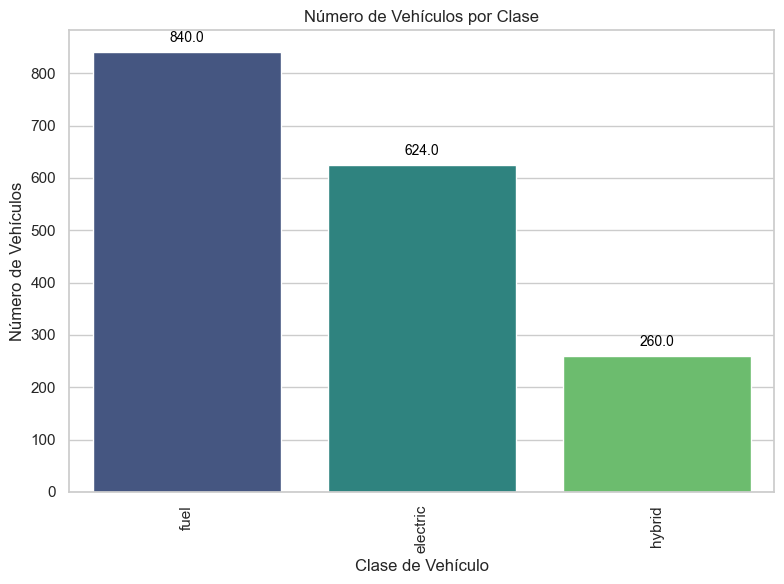

In [56]:
# Gráfico de barras para el conteo de vehículos por clase
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='type', y='count', data=count_by_type_df, palette='viridis')

# Añadir etiquetas a cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', fontsize=10, xytext=(0, 5),
                textcoords='offset points')

plt.title('Número de Vehículos por Clase')
plt.xlabel('Clase de Vehículo')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Matriz de correlación

* Vehiculos a combustion

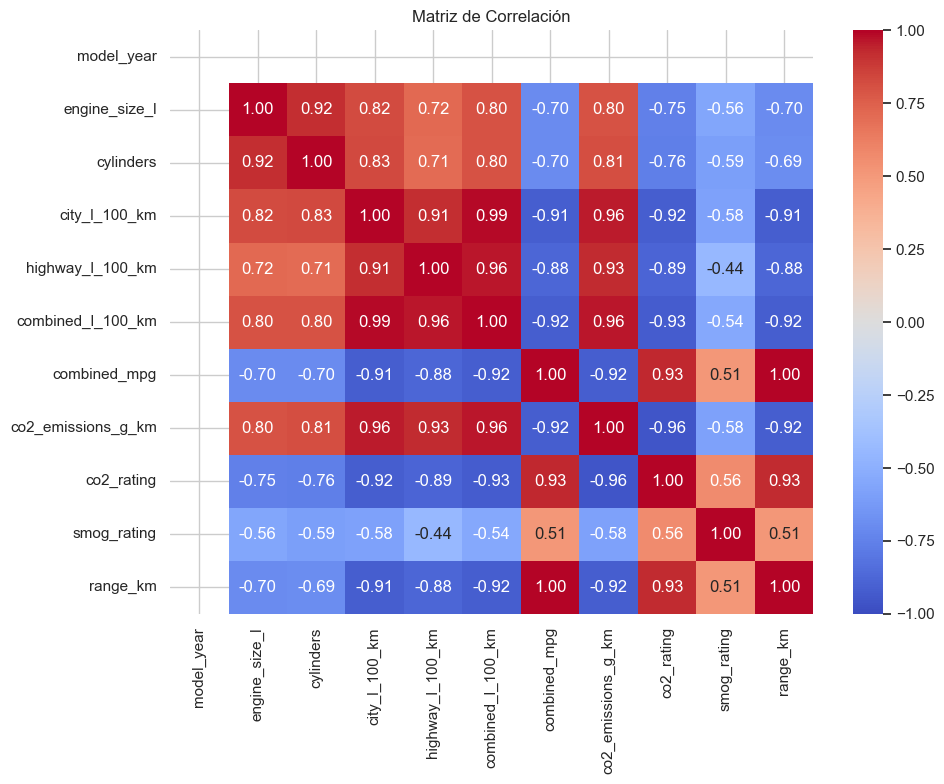

In [59]:
# Filtrar solo las columnas numericas
fuel = fuel.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = fuel.corr()

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

* Vehiculos hibridos

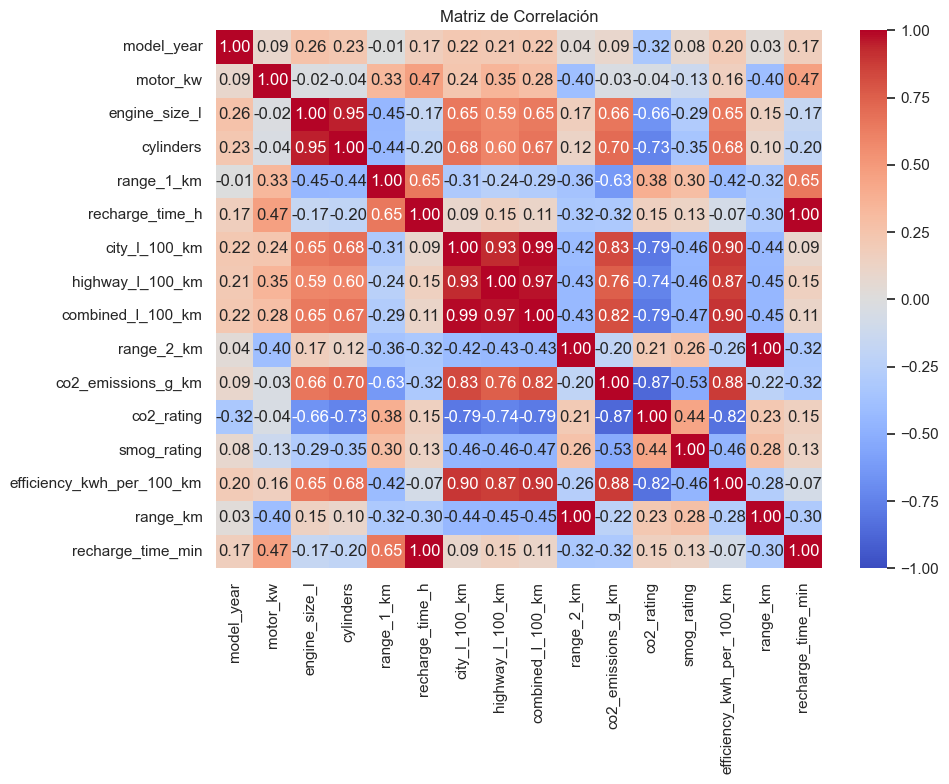

In [60]:
# Filtrar solo las columnas numericas
hybrid = hybrid.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = hybrid.corr()

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

* Vehiculos electricos

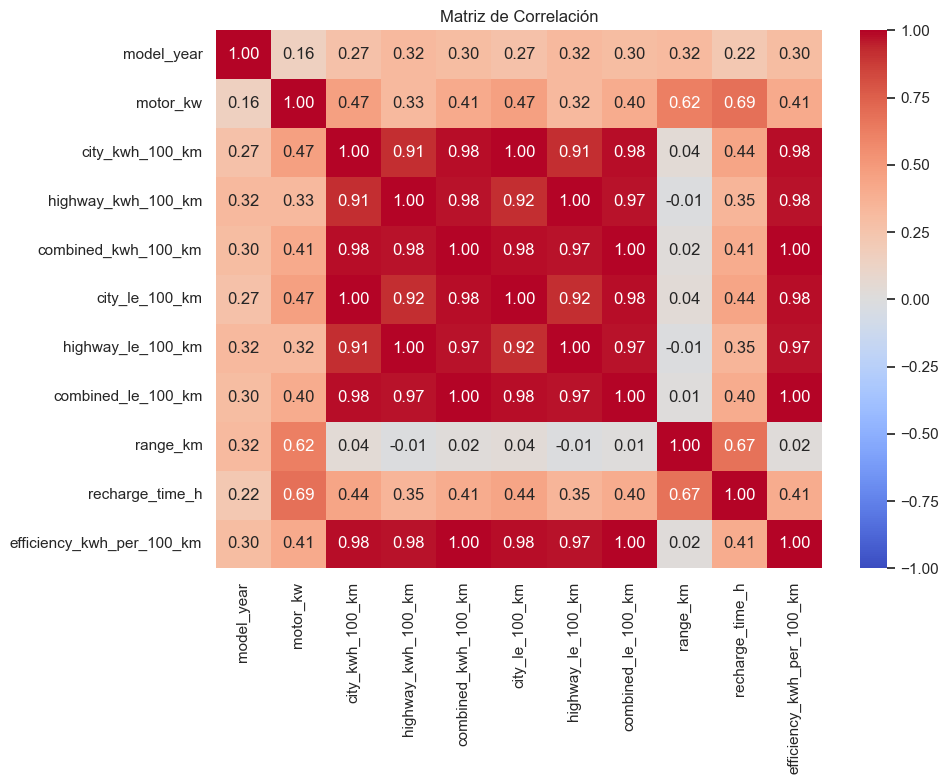

In [63]:
# Filtrar solo las columnas numericas
electric = electric.select_dtypes(include=['float64', 'int64'])

# Eliminar columnas con valores nulos o ceros
matriz_electric = electric.copy()
matriz_electric = matriz_electric.drop(columns=['co2_emissions_g_km', 'co2_rating', 'smog_rating'], axis=1)

# Calcular la matriz de correlación
correlation_matrix = matriz_electric.corr()

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()